In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Specify the path to your CSV file
file_path = "D:/Scifor Project/Salary_Data.csv"

# Load the dataset from the CSV file
data = pd.read_csv(file_path)

Mean Squared Error: 50064732.56031778
Mean Absolute Error: 6294.963138890281
R2 Score: 0.9019868243097158


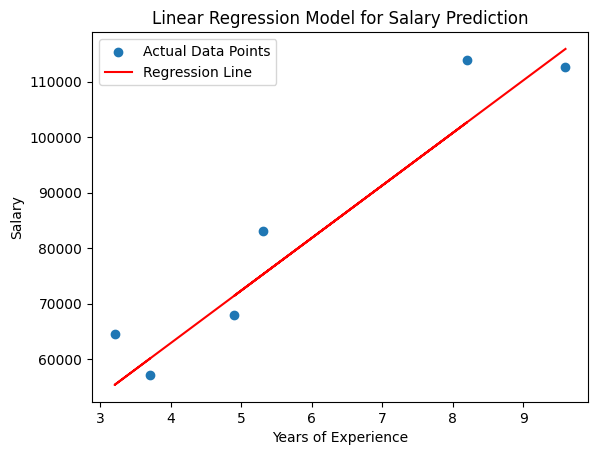

In [4]:
X = data[['YearsExperience']]
y = data['Salary']
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Add a column of ones for the intercept term
X_train_aug = np.column_stack((np.ones(len(X_train)), X_train))
X_test_aug = np.column_stack((np.ones(len(X_test)), X_test))

# Step 4: Define a function named linear_regression
def linear_regression(X, y, learning_rate=0.01, epochs=1000):
    coefficients = np.zeros(X.shape[1])

    m = len(y)

    for epoch in range(epochs):
        y_pred = np.dot(X, coefficients)
        errors = y_pred - y
        gradients = 2/m * np.dot(X.T, errors)
        coefficients = coefficients - learning_rate * gradients

    return coefficients

# Step 5: Train the model
coefficients = linear_regression(X_train_aug, y_train)

# Step 6: Predict on the test set and calculate regression metrics
y_pred = np.dot(X_test_aug, coefficients)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display regression metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Visualize the linear regression plot
plt.scatter(X_test, y_test, label='Actual Data Points')
regression_line = coefficients[0] + coefficients[1] * X_test
plt.plot(X_test, regression_line, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model for Salary Prediction')
plt.legend()
plt.show()